<a href="/assets/tutorial06_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial06/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 6 - שיערוך פילוג בשיטות לא פרמטריות
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Ex 6.3

In [ ]:
dataset = pd.DataFrame([
    [1, 0],
    [7, 0],
    [9, 0],
    [12, 0],
    [4, 1],
    [4, 1],
    [7, 1],
], columns=['x', 'y'])

display(HTML(dataset.T.to_html()))

,0,1,2,3,4,5,6
x,1,7,9,12,4,4,7
y,0,0,0,0,1,1,1


### Section 2

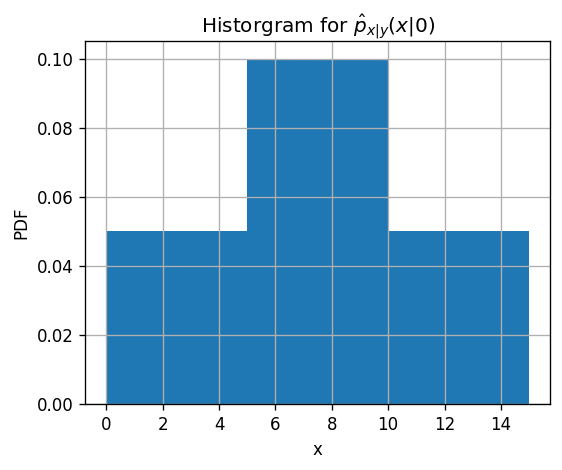

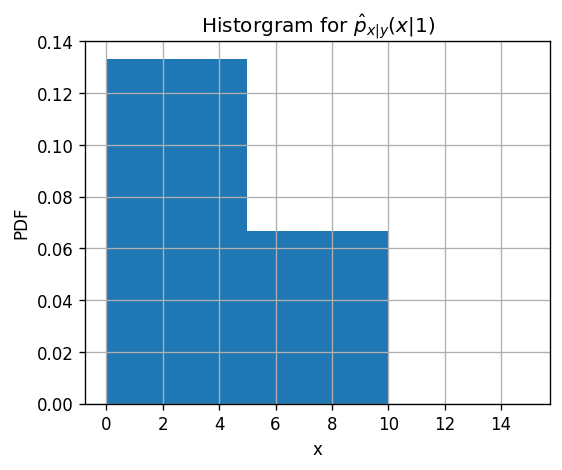

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'Historgram for $\hat{p}_{x|y}(x|0)$')
ax.hist(dataset.query('y==0')['x'].values, bins=[0,5,10,15], density=True)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_1_hist_y_0.png')

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'Historgram for $\hat{p}_{x|y}(x|1)$')
ax.hist(dataset.query('y==1')['x'].values, bins=[0,5,10,15], density=True)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_1_hist_y_1.png')

### Section 3

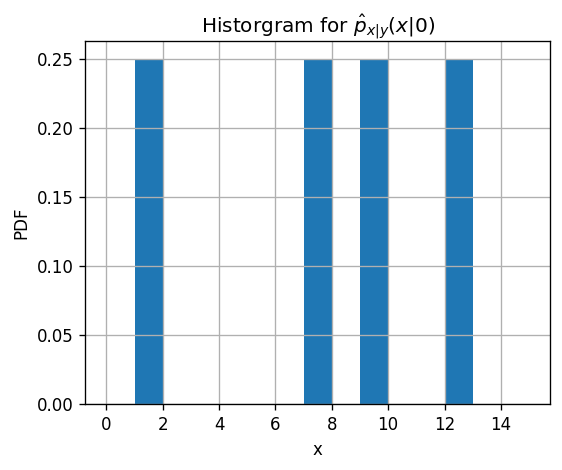

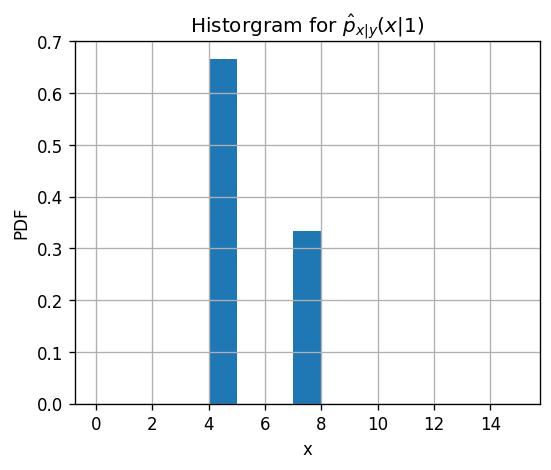

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'Historgram for $\hat{p}_{x|y}(x|0)$')
ax.hist(dataset.query('y==0')['x'].values, bins=np.arange(16), density=True)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_3_hist_y_0.png')

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'Historgram for $\hat{p}_{x|y}(x|1)$')
ax.hist(dataset.query('y==1')['x'].values, bins=np.arange(16), density=True)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_3_hist_y_1.png')

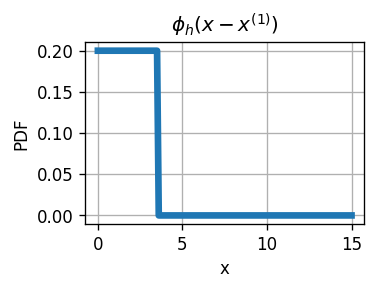

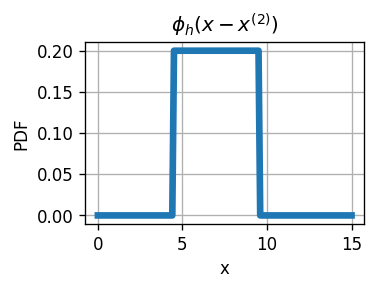

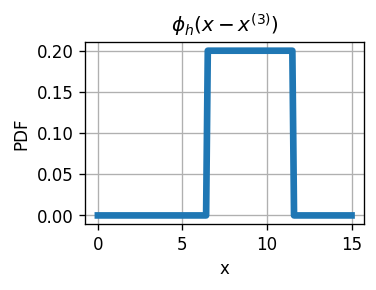

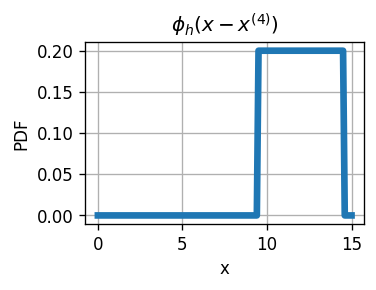

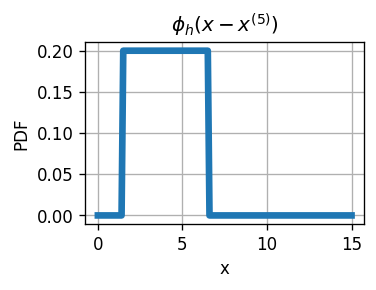

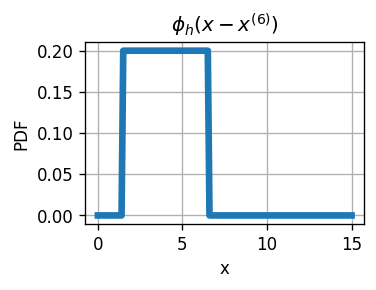

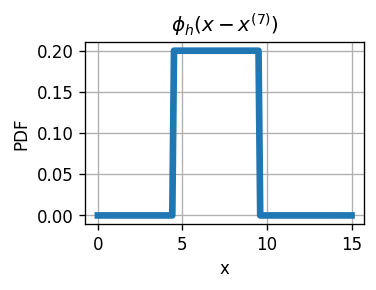

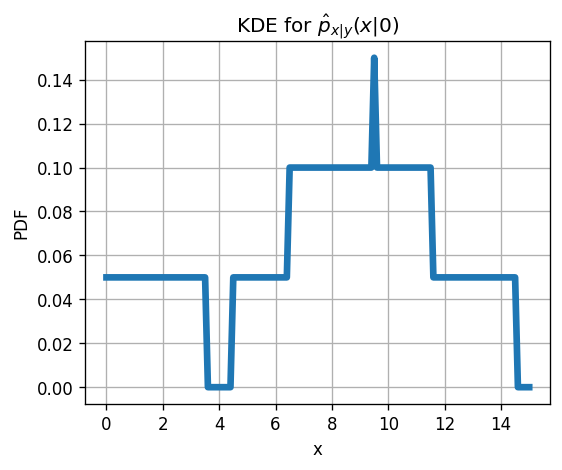

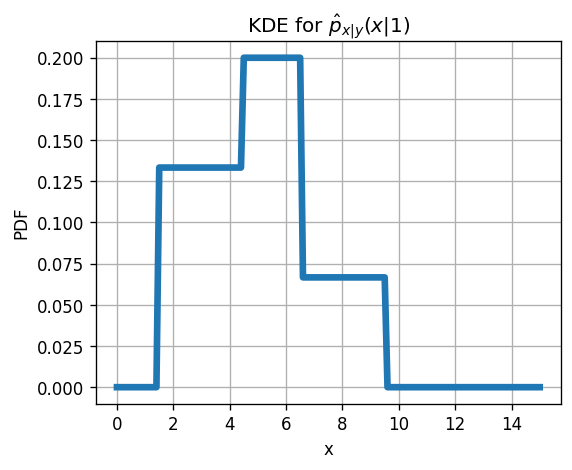

In [ ]:
def gen_kde_square(x, x_ref, h):
    pdf = np.zeros(len(x))
    for center in x_ref:
        pdf += (np.abs(x - center) <= (h / 2)).astype(float) / h / x_ref.shape[0]
    return pdf

h = 5
x_grid = np.arange(0, 15.1, 0.1)
for i, x in enumerate(dataset['x']):
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.set_title('$\phi_h(x-x^{(' + f'{i + 1}' + ')})$')
    ax.plot(x_grid, gen_kde_square(x_grid, np.array([x]), h), linewidth=4)
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')
    fig.savefig(f'./output/ex_6_3_4_kernel_{i + 1}.png')
    

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'KDE for $\hat{p}_{x|y}(x|0)$')
ax.plot(x_grid, gen_kde_square(x_grid, dataset.query('y==0')['x'].values, h), linewidth=4)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_4_kde_y_0.png')

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title(r'KDE for $\hat{p}_{x|y}(x|1)$')
ax.plot(x_grid, gen_kde_square(x_grid, dataset.query('y==1')['x'].values, h), linewidth=4)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
fig.savefig('./output/ex_6_3_4_kde_y_1.png')